In [1]:
import nilearn
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2401635029.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [18]:
%%capture
from nilearn.datasets import fetch_abide_pcp, fetch_atlas_aal
from nilearn.input_data import NiftiLabelsMasker

# Step 1: Fetch ABIDE data
abide_data = fetch_abide_pcp(
    pipeline='cpac',  # Choose the preprocessing pipeline
    derivatives=["rois_ez"],  # Get preprocessed functional data
    n_subjects=1,  # Number of subjects to fetch (for testing purposes)
)
"""
# Step 2: Fetch the AAL atlas
aal_atlas = fetch_atlas_aal(version='SPM12')

# Step 3: Extract region-wise time series
# Initialize the NiftiLabelsMasker with the atlas
masker = NiftiLabelsMasker(
    labels_img=aal_atlas.maps,  # AAL atlas image
    standardize=True,           # Standardize time series
    verbose=0
)

region_time_series = []
for func_file in abide_data["rois_ez"]:  # Path to each subject's functional data
    time_series = masker.fit_transform(func_file)  # Extract signals from AAL regions
    region_time_series.append(time_series)
"""


In [21]:
extracted_signals=abide_data["rois_ez"][0][:,0:90]

In [23]:
extracted_signals.shape

(196, 90)

In [24]:
aal_atlas["labels"]

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

In [22]:
import pandas as pd
pd.DataFrame(extracted_signals).describe()

0             1             2             3             4   \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean  -3.061225e-08 -5.102041e-09  3.061224e-08 -2.551020e-08 -2.040816e-08   
std    1.526242e+01  1.564248e+01  1.191290e+01  1.251586e+01  9.377147e+00   
min   -3.679519e+01 -4.147603e+01 -3.122647e+01 -3.394714e+01 -2.538944e+01   
25%   -1.002177e+01 -1.144543e+01 -9.194090e+00 -8.415461e+00 -6.347818e+00   
50%    4.372850e-02 -7.650365e-01  7.446050e-02  4.828575e-01  2.385080e-01   
75%    1.038777e+01  1.016335e+01  8.677409e+00  8.315818e+00  6.516730e+00   
max    4.108379e+01  4.532789e+01  3.610036e+01  3.553383e+01  2.323297e+01   

                 5             6             7             8             9   \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean  -1.530612e-08 -1.530612e-08  3.571429e-08  4.081633e-08  2.040816e-08   
std    8.329035e+00  9.824799e+00  1.738605e+01  1.392555e+01  1.599475e+01   
min   -2.047601e+01 -2.211893e+01 -4.289244e+01 -3.551792e+01 -3.848487e+01   
25%   -5.514373e+00 -7.269740e+00 -1.292888e+01 -9.996125e+00 -1.091303e+01   
50%   -8.098950e-02  2.015100e-02  5.439205e-01  1.373076e+00  5.761480e-01   
75%    5.851693e+00  6.680939e+00  1.141333e+01  1.018759e+01  1.128085e+01   
max    2.161583e+01  3.162827e+01  4.601583e+01  3.508264e+01  4.564380e+01   

       ...            80            81            82            83  \
count  ...  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean   ... -5.102042e-09  1.530612e-08  2.040816e-08 -5.612245e-08   
std    ...  3.921999e+01  3.861332e+01  2.408421e+01  3.556480e+01   
min    ... -1.205506e+02 -1.279144e+02 -6.386044e+01 -1.005144e+02   
25%    ... -2.634483e+01 -2.475665e+01 -1.404635e+01 -2.511086e+01   
50%    ... -6.078750e-01 -5.490200e-01 -5.428000e-03 -1.896942e+00   
75%    ...  2.367577e+01  2.300551e+01  1.589102e+01  2.523363e+01   
max    ...  1.044352e+02  9.619222e+01  7.096810e+01  9.035362e+01   

                 84            85            86            87            88  \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean   2.551020e-08 -2.900174e-16  3.061225e-08 -1.020408e-08 -3.061224e-08   
std    2.323659e+01  3.783423e+01  2.115632e+01  2.639127e+01  1.346603e+01   
min   -8.495156e+01 -1.068409e+02 -5.580036e+01 -5.385658e+01 -3.963159e+01   
25%   -1.364319e+01 -2.327538e+01 -1.300374e+01 -1.844659e+01 -8.863527e+00   
50%    5.037825e-01  3.039566e+00 -7.073075e-01 -1.988751e+00 -1.297465e-01   
75%    1.428111e+01  2.367261e+01  1.588918e+01  1.885011e+01  8.425241e+00   
max    6.915658e+01  8.791060e+01  5.623675e+01  6.772879e+01  3.444546e+01   

               89  
count  196.000000  
mean     0.000000  
std     22.131406  
min    -63.097521  
25%    -12.881184  
50%     -0.229697  
75%     15.080044  
max     58.464951  

[8 rows x 90 columns]

In [ ]:
# Extract time series for each subject
region_time_series = []
for func_file in abide_data["rois_ez"]:  # Path to each subject's functional data
    time_series = masker.fit_transform(func_file)  # Extract signals from AAL regions
    region_time_series.append(time_series)

# Step 4: Analyze or save the results
# Example: Compute the correlation matrix for the first subject

In [ ]:
from nilearn.datasets import fetch_abide_pcp, fetch_atlas_aal
from nilearn.input_data import NiftiLabelsMasker

# Fetch ABIDE preprocessed functional data
abide_data = fetch_abide_pcp(
    derivatives=['func_preproc'],  # Use raw functional data
    pipeline='cpac',
    n_subjects=1,
)

# Fetch AAL atlas
aal_atlas = fetch_atlas_aal(version='SPM12')

# Create a masker using the AAL atlas
masker = NiftiLabelsMasker(labels_img=aal_atlas.maps, standardize=True, verbose=1)

# Extract region-wise time series
region_time_series = []
for func_file in abide_data["func_preproc"]:  # Path to functional files
    time_series = masker.fit_transform(func_file)  # Extract signals
    region_time_series.append(time_series)


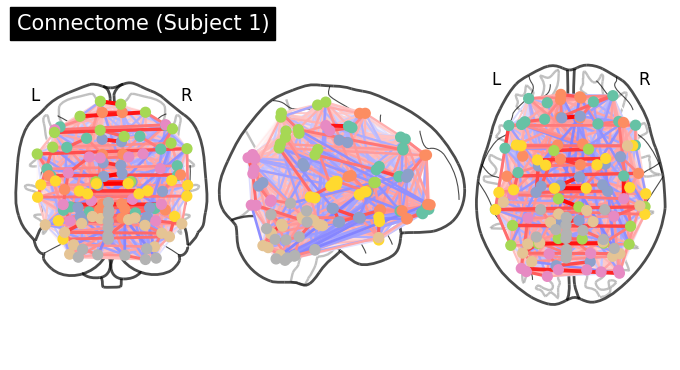

In [26]:
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets, input_data, plotting

connectome = ConnectivityMeasure(kind='partial correlation')
correlation_matrix = connectome.fit_transform([time_series])[0]
"""
plotting.plot_matrix(correlation_matrix, 
                     figure=(10, 8),  # Size of the plot
                     vmax=1, vmin=-1,  # Limits for the color scale
                     title="Functional Connectivity Matrix (Subject 1)", 
                     cmap='coolwarm',  # Color map for the matrix
                     colorbar=True)
"""

# Step 6: Get the coordinates of the ROIs
coordinates = plotting.find_parcellation_cut_coords(labels_img=aal_atlas.maps)
# Step 7: Plot the connectome with an edge threshold (e.g., 80% of the strongest edges)
left_connectome = plotting.plot_connectome(
    correlation_matrix, coordinates, edge_threshold="0.001%", title="Connectome (Subject 1)"
)

# Step 8: Show the plot

In [20]:
aal_atlas.maps

'C:\\Users\\USER\\nilearn_data\\aal_SPM12\\aal\\atlas\\AAL.nii'

In [15]:
import pandas as pd
pd.DataFrame(region_time_series[0]).describe()

0             1             2             3             4    \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean  -2.265761e-18 -1.586033e-17  9.063045e-18  2.265761e-18  6.230844e-18   
std    1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min   -2.565229e+00 -2.423165e+00 -3.258478e+00 -2.905909e+00 -3.008019e+00   
25%   -6.232683e-01 -6.903970e-01 -6.314943e-01 -6.930656e-01 -6.837771e-01   
50%   -9.099852e-02 -9.124092e-02 -2.788498e-02  4.217427e-02 -1.613418e-02   
75%    6.260253e-01  6.069367e-01  6.547641e-01  7.011839e-01  7.306367e-01   
max    2.784695e+00  2.819719e+00  2.653232e+00  2.786145e+00  2.494574e+00   

                5             6             7             8             9    \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean  -2.039185e-17  6.797284e-18  1.246169e-17 -3.625218e-17 -2.605625e-17   
std    1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min   -2.736785e+00 -2.227890e+00 -2.459857e+00 -2.311683e+00 -2.606640e+00   
25%   -6.858280e-01 -7.602955e-01 -6.857737e-01 -7.325914e-01 -6.428842e-01   
50%    4.156120e-02  4.360058e-02  1.782046e-02  4.889112e-02  4.088299e-02   
75%    7.158235e-01  6.664589e-01  6.665022e-01  7.499737e-01  7.055761e-01   
max    2.364397e+00  3.281357e+00  2.775648e+00  2.288305e+00  2.650148e+00   

       ...           106           107           108           109  \
count  ...  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean   ...  6.797284e-18  3.625218e-17 -3.398642e-18  2.718914e-17   
std    ...  1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min    ... -2.900544e+00 -3.214976e+00 -2.605520e+00 -3.216331e+00   
25%    ... -6.744775e-01 -5.985785e-01 -6.916333e-01 -7.423508e-01   
50%    ... -4.405880e-02 -4.104926e-02 -5.967889e-03  5.250974e-02   
75%    ...  7.002290e-01  6.086449e-01  6.152272e-01  6.462578e-01   
max    ...  2.450686e+00  2.623085e+00  2.593164e+00  2.243370e+00   

                110           111           112           113           114  \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean  -1.132881e-17  2.718914e-17  4.531523e-17 -1.359457e-17  9.063045e-18   
std    1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min   -3.316629e+00 -3.451390e+00 -3.103949e+00 -2.455357e+00 -2.543107e+00   
25%   -5.909578e-01 -6.053601e-01 -6.070215e-01 -6.849701e-01 -6.310476e-01   
50%   -1.186309e-02  9.703433e-02  8.291120e-02  4.107084e-02 -2.669174e-02   
75%    6.699220e-01  6.723561e-01  7.003023e-01  7.067830e-01  6.465490e-01   
max    2.516104e+00  2.178577e+00  2.406250e+00  2.648464e+00  2.343482e+00   

                115  
count  1.960000e+02  
mean   1.132881e-18  
std    1.002561e+00  
min   -2.772726e+00  
25%   -6.253613e-01  
50%   -1.515046e-02  
75%    6.748852e-01  
max    3.392502e+00  

[8 rows x 116 columns]

In [2]:
%%capture
from nilearn.datasets import fetch_abide_pcp
import pandas as pd

# Fetch the ABIDE dataset (all subjects, preprocessed data)
abide_data = fetch_abide_pcp(
    derivatives=["rois_cc200"],  # Example: CC200 atlas ROI time-series
    pipeline="cpac",
         n_subjects=1,                   # Choose the preprocessing pipeline: 'cpac', 'dparsf', 'niak', etc.
    data_dir="path_to_store_data_2"  # Specify where to store the dataset
)
# Load phenotypic data into a DataFrame

# Include the derivative file paths (e.g., time-series data)

# Display dataset statistics


In [ ]:
output_file = "multiple_dataframes.xlsx"

# Use ExcelWriter to save DataFrames to different sheets
with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    for i, df in enumerate(abide_data["rois_cc200"]):
        sheet_name = f"Subject_{i+1}"
        df=pd.DataFrame(df)
        df.to_excel(writer, sheet_name=sheet_name, index=False)


In [36]:
df=pd.read_excel("multiple_dataframes.xlsx", sheet_name="Subject_1")
df[0].max()

148.067731

In [21]:
print(f"Total subjects: {len(phenotypic_df)}")
print("Class distribution:")
print(phenotypic_df['DX_GROUP'].value_counts())

Total subjects: 20
Class distribution:
DX_GROUP
1    20
Name: count, dtype: int64


In [37]:
time_series=abide_data["rois_cc200"][0]

In [107]:
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets, input_data, plotting

connectome = ConnectivityMeasure(kind='partial correlation')
correlation_matrix = connectome.fit_transform([time_series])[0]


correlation_matrix[(correlation_matrix >= -0.15) & (correlation_matrix <= 0.15)] = 0

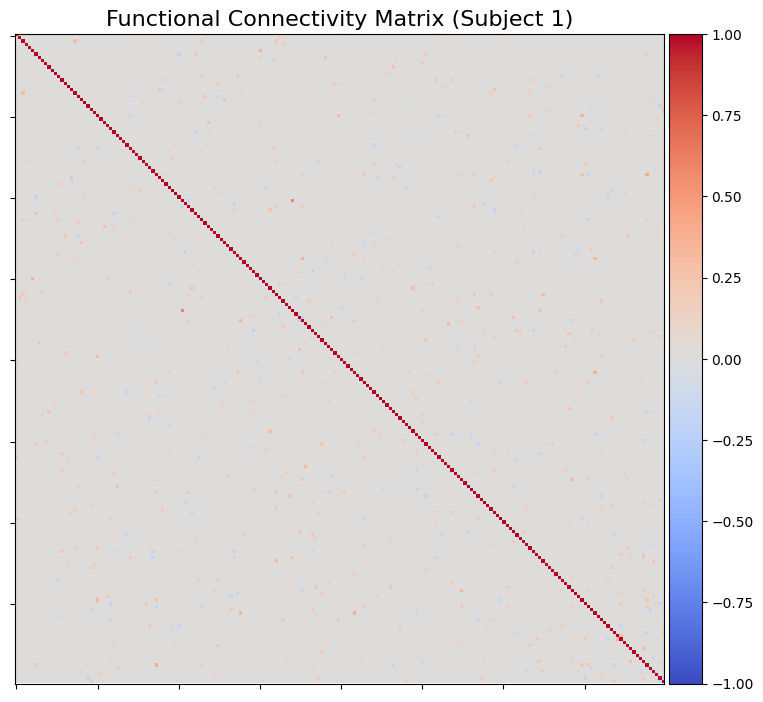

In [108]:
plotting.plot_matrix(correlation_matrix, 
                     figure=(7, 7),  # Size of the plot
                     vmax=1, vmin=-1,  # Limits for the color scale
                     title="Functional Connectivity Matrix (Subject 1)", 
                     cmap='coolwarm',  # Color map for the matrix
                     colorbar=True)


In [109]:
#drawing the graph representation of the connectome
np.fill_diagonal(correlation_matrix,0)
connectivity_graph=nx.from_numpy_array(correlation_matrix)
connectivity_graph=nx.Graph(connectivity_graph)

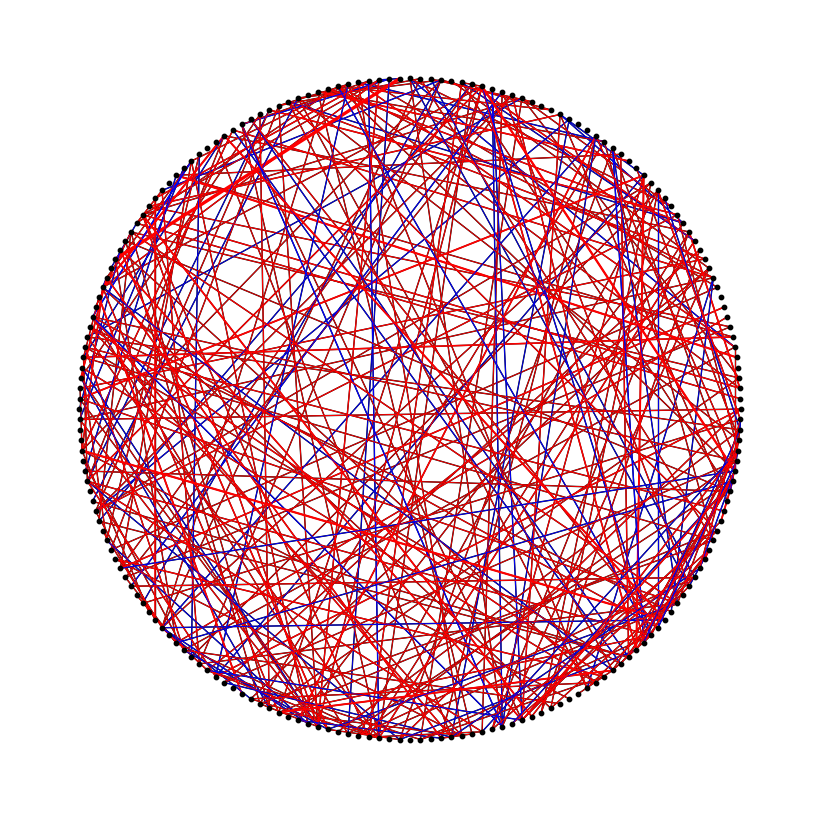

In [169]:
plt.figure(figsize=(8,8))
pos=nx.circular_layout(connectivity_graph)
weight_list=np.array([list(connectivity_graph.edges(data=True))[i][-1]["weight"] for i in range(len(list(connectivity_graph.edges(data=True))))])
edge_color=[]
for edge_ind in range(len(weight_list)):
    if weight_list[edge_ind]>0:
        edge_color+=["red"]

    else:
        edge_color+=["blue"]  
        
nx.draw(connectivity_graph,pos=pos,node_color="black", node_size=10)
nx.draw_networkx_edges(connectivity_graph, pos=pos,
                        edge_color=edge_color , width=np.abs(np.array(weight_list))*4)

In [181]:
nx.degree_histogram(connectivity_graph)

[18, 26, 36, 38, 38, 22, 10, 5, 6, 1]

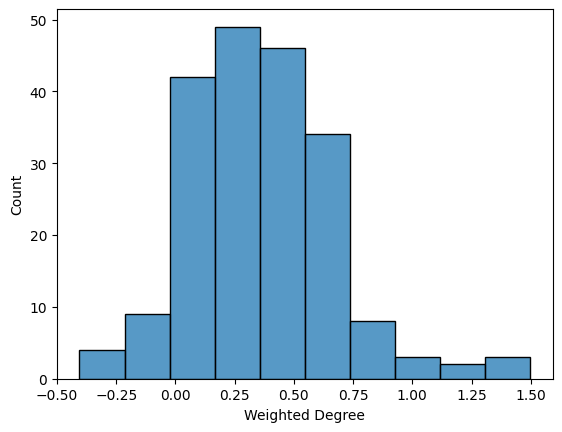

In [201]:
import seaborn as sb

plt.figure()
sb.histplot(np.array(list(dict(nx.degree(connectivity_graph, weight="weight")).values())), binwidth=0.2)
plt.xlabel("Weighted Degree")
plt.show()

In [186]:
list(set(dict(nx.degree(connectivity_graph)).values()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

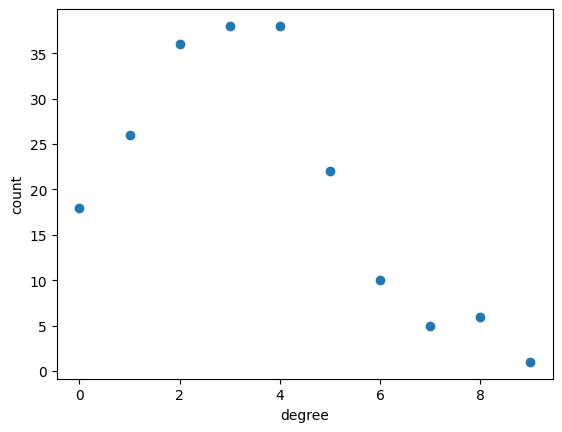

In [202]:
plt.figure()
plt.scatter(list(set(dict(nx.degree(connectivity_graph)).values())), nx.degree_histogram(connectivity_graph))
plt.xlabel("degree")
plt.ylabel("count")
plt.show()

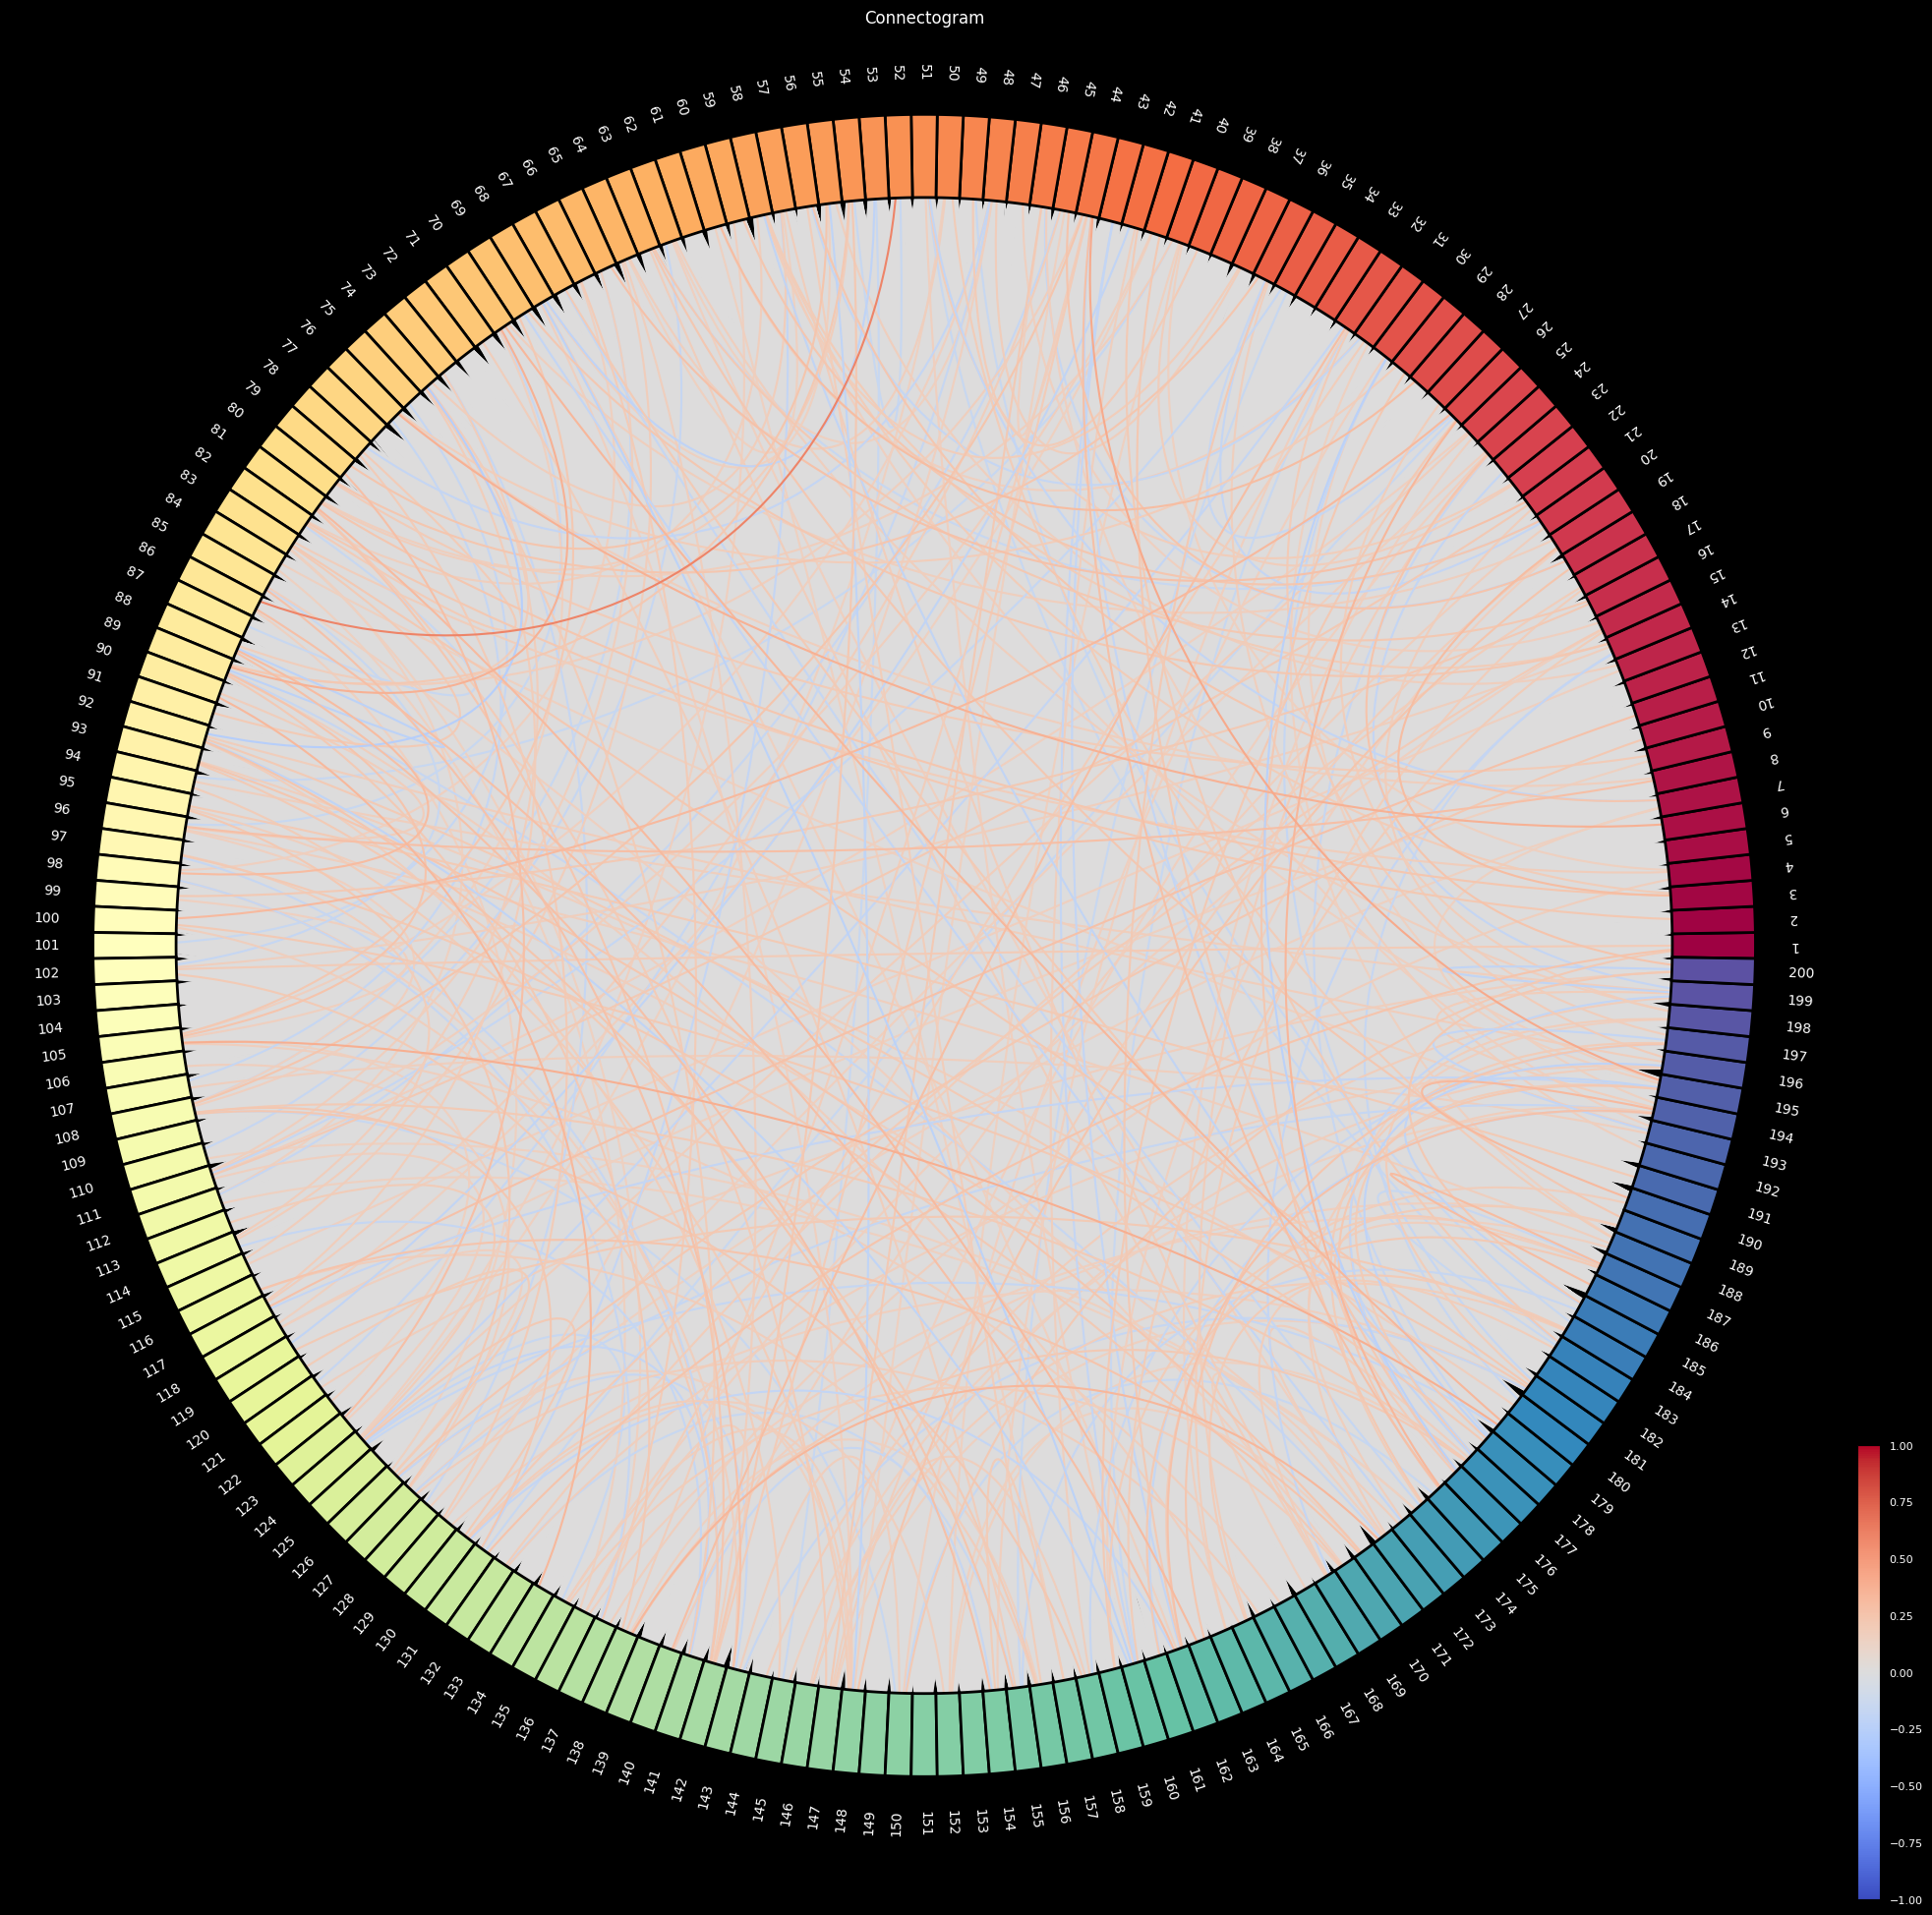

(<Figure size 3000x3000 with 2 Axes>,
 <PolarAxes: title={'center': 'Connectogram'}>)

In [224]:
from mne_connectivity.viz import plot_connectivity_circle

# Generate a random correlation matrix (e.g., 10x10) as an example
corr_matrix = correlation_matrix  # Make it symmetric (undirected)

# Use MNE's function to visualize the connectivity matrix as a connectogram
# Define the channel names (or regions of interest for the correlation matrix)
ch_names = [f'{i+1}' for i in range(len(corr_matrix))]

# Plot the connectogram (circular layout)
fig, ax = plt.subplots(figsize=(30, 30), facecolor="black", subplot_kw=dict(polar=True))
plot_connectivity_circle(corr_matrix, ch_names, title="Connectogram", colormap='coolwarm', vmin=-1, vmax=1, fontsize_names=10, padding=1,ax=ax)
